# **3rd DNN**

**3rd network DNN Thinking about**

1.Batch Normalization,
2. Image Normalization,
3. DropOut
4. The distance of MaxPooling from Prediction,
5. The distance of Batch Normalization from Prediction,
6. When do we introduce DropOut, or when do we know we have some overfitting

Purpose to get the No of total Parameters to less then 15K

**This is version 1  **

  Adding Batch normalization in version 1 model for all layers

*Result*
Increased total Params; Lower over fitting though still  visible


installing and Importing Keras for current solution

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing Numpy and Keras modules as well as mnist data set.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

Loading mnist data set in train and test variables.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Ploting sample from train data set.

(60000, 28, 28)


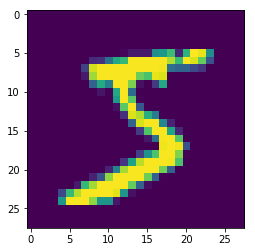

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshaping all train and test data to a uniform size.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Regularizing train and test data for float data type and division wiht 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Visualizing train out put

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

Viewing tranformed train out put matrix

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

2nd network DNN
Thinking about 
1.1. 3x3 Convolutions,
2. Receptive Field,
3. MaxPooling,
4. 1x1 Convolutions,
5. Concept of Transition Layers,
6. Position of Transition Layer,
7. SoftMax,
8. How many layers,
9. Kernels and how do we decide the number of kernels?
10. Position of MaxPooling,

Purpose to get the No of total Parameters to less then 15K

In [11]:
from keras.layers import Activation, BatchNormalization
model = Sequential()

#Vanilla
''' 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10, 1, activation='relu'))
model.add(Convolution2D(10, 26))
'''

#1st version 
''''''
model.add(Convolution2D(8, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 22,22 #RF 9X9
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 20,20 #RF 11X11
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 18,18 #RF 13X13
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 16,16 #RF 15X15
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 14,14 #RF 17X17
model.add(BatchNormalization())

model.add(Convolution2D(8, 3, 3, activation='relu')) #input 12,12 #RF 19X19
model.add(BatchNormalization())

model.add(Convolution2D(10, 1)) #input 10,10 , activation='relu'
model.add(BatchNormalization())

model.add(Convolution2D(10, 10)) #input 10,10


#2nd version 
'''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 24,24 #RF 7X7
model.add(MaxPooling2D(pool_size=(2, 2))) #input 22,22 #RF 14X14
model.add(Convolution2D(8, 3, 3, activation='relu')) #input 11,11 #RF 16X16
model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 9)) #input 9X9
'''

#3rd version 
'''
model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 26,26 #RF 3X3
model.add(MaxPooling2D(pool_size=(2, 2))) #input 24,24 #RF 6X6
model.add(Convolution2D(16, 3, 3, activation='relu')) #input 12,12 #RF 8X8
model.add(Convolution2D(10, 1, activation='relu')) #input 9,9
model.add(Convolution2D(10, 10)) #input 9X9
'''

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  app.launch_new_instance()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the K

Printing model summary to understand current paramaters for the model. 

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 8)         32        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 22, 22, 8)         584       
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 8)         32        
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 20, 20, 8)         584       
__________

Setting model's compile environment with loss function, optimizer and matrics.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Training model for 20 epoch for 32 batch size

In [14]:
history = model.fit(X_train, Y_train, batch_size=32, nb_epoch=20, verbose=1, validation_data=(X_test, Y_test))

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 29s 484us/step - loss: 0.1988 - acc: 0.9376 - val_loss: 0.0946 - val_acc: 0.9706
Epoch 2/20
60000/60000 [==============================] - 27s 450us/step - loss: 0.0855 - acc: 0.9733 - val_loss: 0.0778 - val_acc: 0.9759
Epoch 3/20
60000/60000 [==============================] - 26s 433us/step - loss: 0.0695 - acc: 0.9784 - val_loss: 0.0546 - val_acc: 0.9831
Epoch 4/20
60000/60000 [==============================] - 26s 432us/step - loss: 0.0571 - acc: 0.9825 - val_loss: 0.0781 - val_acc: 0.9761
Epoch 5/20
60000/60000 [==============================] - 28s 458us/step - loss: 0.0519 - acc: 0.9842 - val_loss: 0.0477 - val_acc: 0.9853
Epoch 6/20
60000/60000 [==============================] - 26s 429us/step - loss: 0.0458 - acc: 0.9856 - val_loss: 0.0523 - val_acc: 0.9838
Epoch 7/20
60000/60000 [==============================] - 26s 428us/step - loss: 0.0425 - acc: 0.9863 - val_loss: 0.

Plotting training and validation accuracty as well as loss for every epoch

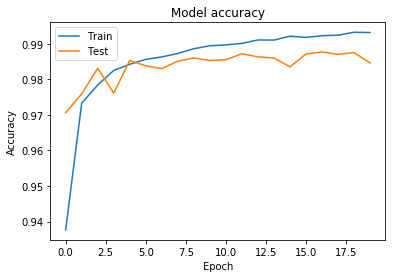

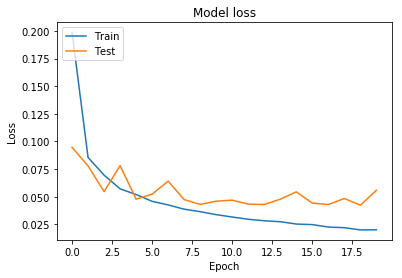

In [15]:
import matplotlib.pyplot as plt

#history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Evaluating model and storing score in a variable.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Printing loss and accuracy of model test done in last step

In [17]:
print(score)

[0.0558088493988238, 0.9846]


Predicting out put for test inputs

In [0]:
y_pred = model.predict(X_test)

Printing prediction and test out puts 

In [19]:
print(y_pred[:9])
print(y_test[:9])

[[1.61458572e-11 2.49446436e-11 4.78801310e-09 4.06922496e-10
  9.99785974e-13 2.61042192e-13 8.94570469e-15 1.00000000e+00
  1.05510363e-14 1.67871306e-09]
 [2.32847324e-08 4.57436863e-06 9.99994397e-01 1.56670765e-08
  1.63963895e-12 1.02018255e-11 4.89973822e-08 3.41088199e-11
  9.20357081e-07 6.01931834e-14]
 [1.36693830e-08 9.99995470e-01 1.80996218e-09 2.01093786e-09
  2.93569269e-06 4.21859312e-08 5.55671065e-09 1.50723292e-06
  1.09929834e-08 5.29254751e-10]
 [9.99961138e-01 7.23517947e-12 1.79537096e-08 3.80639582e-11
  2.47138896e-08 1.31419640e-07 3.63442414e-05 3.25251936e-10
  2.32206276e-06 8.95038994e-08]
 [1.61349004e-10 6.60480297e-13 3.42196302e-12 7.72056640e-15
  9.99992013e-01 2.13308357e-10 6.17680413e-14 1.45223944e-09
  1.37300804e-09 7.96996574e-06]
 [1.40935228e-08 9.99983191e-01 2.39972220e-08 5.27971833e-10
  1.04223873e-05 6.68229383e-09 6.12126660e-09 6.23049345e-06
  1.11222441e-07 1.67729264e-09]
 [3.64949770e-14 1.96824024e-12 3.43599106e-15 1.16452345e

In [20]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
layer_dict

{'activation_1': <keras.layers.core.Activation at 0x7f1a6f923b38>,
 'batch_normalization_1': <keras.layers.normalization.BatchNormalization at 0x7f1a9c20f0f0>,
 'batch_normalization_10': <keras.layers.normalization.BatchNormalization at 0x7f1a6f93cc18>,
 'batch_normalization_2': <keras.layers.normalization.BatchNormalization at 0x7f1a9c20f4e0>,
 'batch_normalization_3': <keras.layers.normalization.BatchNormalization at 0x7f1a9c180e10>,
 'batch_normalization_4': <keras.layers.normalization.BatchNormalization at 0x7f1a9003c7f0>,
 'batch_normalization_5': <keras.layers.normalization.BatchNormalization at 0x7f1a6ff2bf98>,
 'batch_normalization_6': <keras.layers.normalization.BatchNormalization at 0x7f1a6fdb4828>,
 'batch_normalization_7': <keras.layers.normalization.BatchNormalization at 0x7f1a6fd63d30>,
 'batch_normalization_8': <keras.layers.normalization.BatchNormalization at 0x7f1a6fc174a8>,
 'batch_normalization_9': <keras.layers.normalization.BatchNormalization at 0x7f1a6fb05630>,
 '

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_2'):  
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()